<a href="https://colab.research.google.com/github/DSP557-ResearchCapstoneURI/CapstoneProject/blob/Ryan/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data = pd.DataFrame(pd.read_csv ('/content/drive/My Drive/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
data.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [64]:
column_list = data.columns.tolist()
print(column_list)

['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3

In [65]:
# make the walkability score its own dependent variable
walkability_given = data['NatWalkInd']
print(walkability_given.describe())

count    220740.000000
mean          9.541628
std           4.373952
min           1.000000
25%           5.833333
50%           9.166667
75%          13.166667
max          20.000000
Name: NatWalkInd, dtype: float64


In [66]:
# drop walkability score from the dataset, leaving only dependent variables
# drop OBJECTID because it is the GIS ID number
# drop Shape length and area because these are the GIS shape measurements and not independent variables
columns_to_drop = ['NatWalkInd', 'OBJECTID', 'Shape_Length', 'Shape_Area']
data = data.drop(columns=columns_to_drop)

In [67]:
# find the originial shape of the dataframe
data.shape

(220740, 113)

In [73]:
#find the columns that contain null values
num_nulls_in_columns = data.isnull().sum()
columns_containing_nulls = num_nulls_in_columns[num_nulls_in_columns > 0]
print(columns_containing_nulls)

GEOID10          1
CSA          53031
CSA_Name     53031
CBSA         17095
CBSA_Name    17095
CountHU        275
HH             275
D1A            271
D1C8_OFF       605
D4D              1
D4E              1
dtype: int64


In [75]:
# find the number of numeric and categorical columns in the dataset
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", len(numeric_cols))
print("Categorical Columns:", len(categorical_cols))

Numeric Columns: 111
Categorical Columns: 2


In [76]:
# analyze the categorical columns
print("Categorical Column Names:", categorical_cols)
cat_cols = data[categorical_cols]
print(cat_cols.nunique())
print(cat_cols.head())

Categorical Column Names: Index(['CSA_Name', 'CBSA_Name'], dtype='object')
CSA_Name     175
CBSA_Name    938
dtype: int64
                   CSA_Name                        CBSA_Name
0  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
1  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
2  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
3  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX
4  Dallas-Fort Worth, TX-OK  Dallas-Fort Worth-Arlington, TX


In [77]:
# drop the categorical columns from the dataset
data.drop(cat_cols, axis=1, inplace=True)

In [78]:
# verify the shape of the dataset after dropped rows and columns
data.shape

(220740, 111)

In [80]:
# check to see the columns containing null values again
num_nulls_in_columns = data.isnull().sum()
columns_containing_nulls = num_nulls_in_columns[num_nulls_in_columns > 0]
print(columns_containing_nulls)
# we removed the two categorical columns that contain nulls, but the numeric still contain the same number of nulls, so we were not able to save any rows

# find the total number of null values in the dataframe
data.isnull().sum().sum()

GEOID10         1
CSA         53031
CBSA        17095
CountHU       275
HH            275
D1A           271
D1C8_OFF      605
D4D             1
D4E             1
dtype: int64
71555


In [81]:
# remove all rows that contain null values
data = data.dropna()
print(data.shape)
data.isnull().sum().sum()

(167265, 111)


0

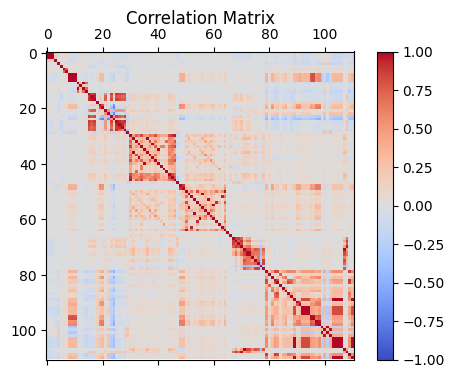

In [61]:
# make correlation and covariance matrix
corr_matrix = data.corr()
cov_matrix = data.cov()

fig, ax = plt.subplots(figsize=(6, 4))

# Display the correlation matrix as an image
corr_matrix_image = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
fig.colorbar(corr_matrix_image)

# Show the plot
plt.title("Correlation Matrix", pad=20)
plt.show()

Everything really red or really blue is highly correlated and should be reviewed to be removed after PCA, if PCA doesn't cover it. It is really cool how the highly correlated fields seem to form squares. This shows that the correlated columns are next to each other, which makes sense when looking at the column names.

From here, we still have a lot of data cleaning to complete before the dataset is ready to analyze. Mainly we need to reduce the dimensionality, which will likely be fixed with PCA analysis, but may require some manual effort after. We also need to set up the dataset to randomly subset the dataset down to, say, 1000 rows at a time. We can set a seed to start, but we may want this to be randomly generated each time.

I deleted the 2 categorical datasets because separating these out to 1s and 0s would cause the dimensionality to increase even more. And I don't want to list them 1 to however-many-values because I don't want this to be thought of as a weighted score when it is just the locations of the points.

I think simply deleting these 2 columns warrants further discussion, but my thought is that our analysis should be based on the walkability of the area without knowing the location so that we can create a map to show the walkability scores in each location without having that location impact our model's accuracy.

Whenever deleting columns, be sure to include why you are deleting the columns in the notes so we can discuss further on Thursday. For example, if the columns have duplicate data, or are too highly correlated. We can use the PCA analysis as our main explanation for reducing the dimensionality too.